In [1]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset_path = "/content/drive/MyDrive/dataset"

In [4]:
# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize all images to 224x224
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize to [-1,1] range
])

In [7]:
dataset = datasets.ImageFolder(root=dataset_path, transform=transform)
# Print class names
class_names = dataset.classes
print("Classes:", class_names)

Classes: ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


In [8]:
# Define train-validation split
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])

# Create DataLoaders
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=32, shuffle=False)

print(f"Training images: {len(train_ds)}, Validation images: {len(val_ds)}")

Training images: 2528, Validation images: 632


In [9]:
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),  # Flip images randomly
    transforms.RandomRotation(20),  # Rotate images randomly
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Apply transformations only to the training set
train_ds.dataset.transform = train_transform

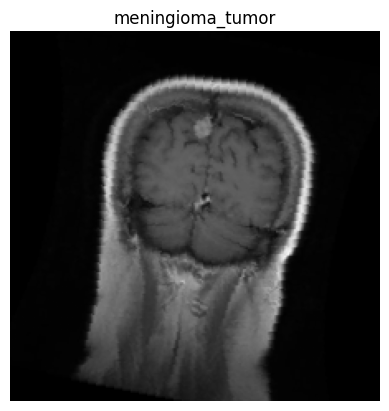

In [10]:
def imshow(img, label):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy().transpose((1, 2, 0))
    plt.imshow(npimg)
    plt.title(class_names[label])
    plt.axis("off")
    plt.show()

# Get one batch of images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Display the first image
imshow(images[0], labels[0].item())